# CSCE 623 Homework Assignment 3
## Student Name: David Crow
## Date: 26 April 2019

In [1]:
"""
HW3
"""

import numpy as np
import matplotlib.pyplot as plt

#make plots inline using jupyter magic
%matplotlib inline

import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model

from IPython.display import Markdown as md  #enable markdown within code cell
from IPython.display import display, Math, Latex

#------ADDITIONAL STUDENT IMPORTS----------------
#put student imports below this line
import math
from scipy import linalg
from sklearn import utils

## STEP 0 (helper functions):
Instructor provided code for data generation & polynomial feature generation


 CHECKING MAKEDATA (Quantity = 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
x    5 non-null float64
y    5 non-null float64
dtypes: float64(2)
memory usage: 160.0 bytes


          x          y
0 -0.331912  -1.658178
1  0.881298  -2.326590
2 -1.999543 -12.359352
3 -0.790670  -0.905642
4 -1.412976  -6.422995

 CHECKING POLY DESIGN MATRIX
[[ 1.         -0.33191198  0.11016556 -0.03656527]
 [ 1.          0.88129797  0.77668612  0.6844919 ]
 [ 1.         -1.9995425   3.99817021 -7.99451126]
 [ 1.         -0.79066971  0.62515859 -0.49429396]
 [ 1.         -1.41297644  1.99650241 -2.82101086]]


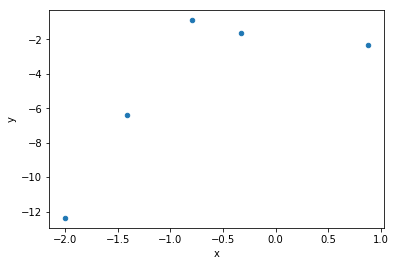

In [2]:
#STEP 0 -  instructor provided

def makeData(myseed=1, quantity=100):
    np.random.seed(myseed)
    x = np.random.uniform(low=-2.,high=2.,size=quantity)  
    y = x - 2 * (x ** 2) + np.random.normal(size=quantity)
    df = pd.DataFrame({'x': x, 'y': y})
    return(df) 


def polyDesignMatrix(x, p):
    '''returns a polynomial design (numpy) matrix from a single feature column vector x.
    The return matrix contains columns of x**0, x**1, … x**p 
    where p is the desired highest order of the polynomial.'''
    x = np.array(x)  
    X = np.transpose(np.vstack((x**k for k in range(p+1))))
    return(X)


#test the function
print("\n CHECKING MAKEDATA (Quantity = 5)")
checkdata = makeData(quantity = 5)
print("\n")
checkdata.info()
checkdata.head()
print("\n")
print(checkdata)
checkdata.plot.scatter(x='x', y='y')
print("\n CHECKING POLY DESIGN MATRIX")
checkpoly = polyDesignMatrix(checkdata['x'],3)
print(checkpoly)

## STEP 1 (data generation and description):

In [3]:
df1=makeData()
pd.set_option("display.max_rows", 10)

#---STUDENTS: add code to display the answers to question 1 in this cell and/or a markdown cell below

display(df1)
df1.info()

# count the number of rows and columns in the dataframe; subtract 1 for the response column
print("\n\nn:", len(df1.index), "\np:", len(df1.columns) - 1)

,x,y
0,-0.331912,-0.236608
1,0.881298,-2.694275
2,-1.999543,-10.302087
3,-0.790670,-1.213012
4,-1.412976,-5.175887
...,...,...
95,-1.051892,-5.161207
96,1.613518,-4.240280
97,0.294718,1.022488
98,-1.988519,-7.368606


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
x    100 non-null float64
y    100 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


n: 100 
p: 1


#### How many observations?
This dataset has 100 observations. We can see this in the table and in the `.info()` call.

#### How many features/predictors?
This dataset has 1 feature. It's called $x$. We can see this in the table and in the `.info()` call.

#### Determine and display the value of $n$ (count the observations)  and the value for $p$ (count the predictors (features)).
Okay.

## STEP 2 (scatterplot and description):

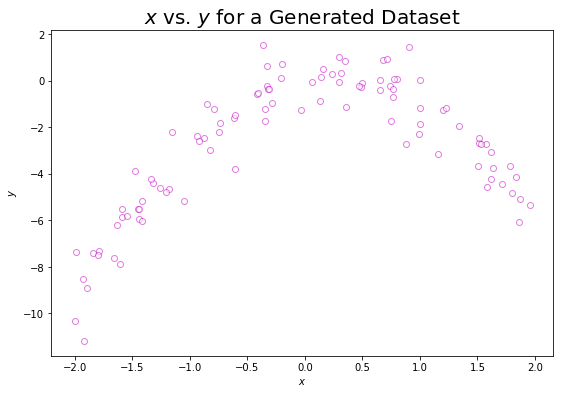

In [4]:
#---ADD STUDENT CODE HERE

fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.set_title("$x$ vs. $y$ for a Generated Dataset", fontsize=20)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.scatter(df1[['x']], df1[['y']], alpha=0.5, edgecolors='m', facecolors='w')

#### Describe the shape of the data. What kind of relationship will fit the data?  Linear? Polynomial (and if so, what order of polynomial)? Form an official hypothesis about the best order model.
In this dataset, $x$ is uniformly distributed from -2.0 to 2.0, and $y$ is non-uniformly distributed from -12 to 2. Furthermore, $x$ and $y$ are quadratically related.

*Hypothesis: To effectively model the `df1` dataset, we should use a polynomial model of order 2. In other words, we should fit a quadratic model to this dataset.*

## STEP 3 (Ordinary least squares):

In [5]:
def getOLScoefficients(X, y):
    '''computes and returns the OLS coefficients (betas) from design matrix X
    and response variable y.  Returns a ROW VECTOR of betas
    First column of design matrix should contain only values equalling 1.'''
    
    #----STUDENT - INSERT CODE HERE TO COMPUTE BETAS
    
    return (linalg.inv(X.T @ X) @ X.T @ y).T

def getOLSpredictions(X, betas):
    '''computes and returns the OLS predictions (yhat) from design matrix X
    and ROW VECTOR betas.  yhat will be a column vector.
    First column of design matrix should contain only values equalling 1.'''

    #----STUDENT - INSERT CODE HERE TO COMPUTE PREDICTIONS
    
    return np.dot(X, betas.T)

## STEP 4 (implement LOOCV as a function):

#### A note concerning future steps
Because steps 4, 7, and 8 all compute RSS in the same way (after the training and testing sets are determined, that is), I'm going to place the repeated code in this function here. It makes the following steps a bit cleaner.

In [6]:
def computeRss(train, test, modelOrder):
    # create design matrices for the x-values in the training and testing sets
    train_design = polyDesignMatrix(train['x'], modelOrder)
    test_design = polyDesignMatrix(test['x'], modelOrder)

    # estimate the coefficients
    betas = getOLScoefficients(train_design, train[['y']])

    # predict yhat and compute the residual errors
    yhat = getOLSpredictions(test_design, betas)
    ydiff = test['y'] - yhat.ravel()

    # return the sum of squared residual errors
    return np.dot(ydiff.T, ydiff)

In [7]:
def LOOCVerr(df, modelOrder):
    #---STUDENT - MODIFY THE CODE HERE---
    
    # we'll add to this
    errors = []

    # for each row in the dataframe...
    for i in df.index:
        # training set is everything but the i-th row
        train = df.loc[df.index != i]
        
        # test set is the i-th row itself
        test = df.loc[i]
        
        # append the RSS value
        errors.append(computeRss(train, test, modelOrder))
    
    return np.array(errors)

## STEP 5 (compute LOOCV errors on polynomial model orders 1,2,3,4):

In [8]:
#---ADD STUDENT CODE HERE

models = []
for i in range(1, 5):
    models.append(LOOCVerr(df1, i))

## STEP 6 (plot LOOCV MSE as a function of model order):

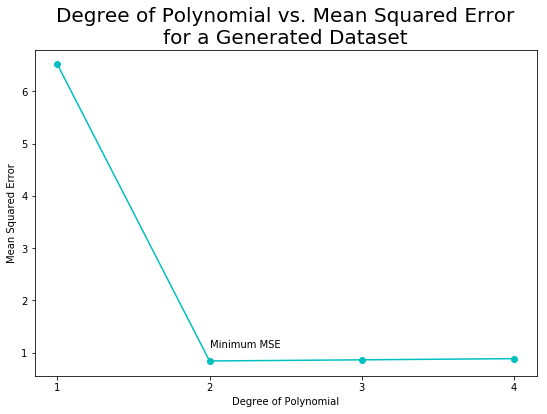

In [9]:
#---ADD STUDENT CODE HERE

# compute the mean squared error for each model
mse = []
for i in range(len(models)):
    mse.append(np.mean(models[i]))

# format these for plotting
mse = np.array(mse)
orders = np.linspace(1, len(models), len(models), dtype=int)

# pretty-fy the plot
fig, ax = plt.subplots(1, 1, figsize=(9,6))
ax.set_title("Degree of Polynomial vs. Mean Squared Error\nfor a Generated Dataset", fontsize=20)
ax.set_xlabel("Degree of Polynomial")
ax.set_ylabel("Mean Squared Error")
ax.set_xticks(orders)

# add a label for the point with the minimum MSE
ax.annotate("Minimum MSE", xy=(orders[np.argmin(mse)], np.min(mse)),
    xytext=(orders[np.argmin(mse)], np.min(mse) + 0.25))

ax.plot(orders, mse, color='c', marker='o')

The LOOCV MSE for this dataset is minimized when we fit a model of order 2. In other words, a quadratic model fits this dataset best (at least where LOOCV is concerned). This aligns with the hypothesis formed in step 2.

## STEP 7 (implement valset as a function):

In [10]:
def VALSETerr(df, modelOrder, splitseed):
    #---ADD STUDENT CODE HERE
    
    # training set is a random 50% of the dataset
    train = df.sample(frac=0.5, random_state=splitseed)
    
    # testing set is everything that isn't in the training set
    test = pd.concat([df, train]).drop_duplicates(keep=False)
    
    # return the MSE value
    return computeRss(train, test, modelOrder) / len(test)

## STEP 8 (implement k-fold cross-validation as a function):

In [11]:
def KFOLDerr(df, modelOrder, k, splitseed):
    errorterms = []
    #---ADD STUDENT CODE HERE
    
    # shuffle the dataframe (using the random seed)
    shuffled = utils.shuffle(df, random_state=splitseed)
    
    # we need k folds
    folds = []
    for i in range(k):
        folds.append([])
    
    # round-robin over the dataframe to distribute the rows to the folds
    for i in range(len(df)):
        folds[i % k].append(shuffled.iloc[i])

    # convert each fold into a dataframe
    for i in range(k):
        folds[i] = pd.DataFrame(folds[i])
        
    for test in folds:
        # training set is everything that isn't in the fold
        train = pd.concat([df, test]).drop_duplicates(keep=False)
        
        # append the MSE value
        errorterms.append(computeRss(train, test, modelOrder) / len(test))

    return errorterms

## STEP 9 (compute and collect MSEs from validation methods):

In [12]:
#---ADD STUDENT CODE HERE

all_mses = []

# for each model...
for i in range(3):
    all_mses.append([])
    
    # for 10 different random seeds...
    for j in range(10):
        all_mses[i].append([])
        
        # for four different polynomial orders...
        for k in orders:
            all_mses[i][j].append([])

# for each random seed...
for i in range(10):
    # for each polynomial order...
    for j in range(len(orders)):
        # validation set
        all_mses[0][i][j].append(VALSETerr(df1, j + 1, i + 1))
        
        # 5-fold cross-validation
        all_mses[1][i][j].append(KFOLDerr(df1, j + 1, 5, i + 1))
        
        # 10-fold cross-validation
        all_mses[2][i][j].append(KFOLDerr(df1, j + 1, 10, i + 1))

valset_errors = np.array(all_mses[0])
fivefold_errors = np.array(all_mses[1])
tenfold_errors = np.array(all_mses[2])

## STEP 10 (build "spaghetti" plots of cross validation results):

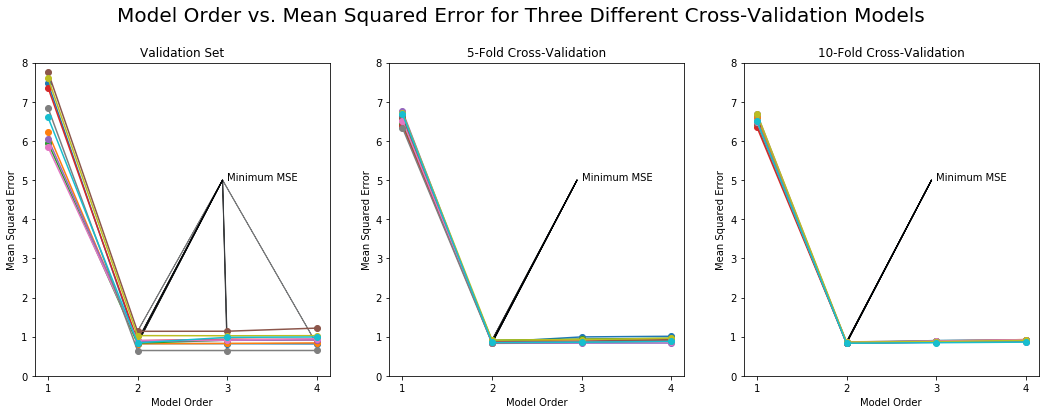

In [13]:
#---ADD STUDENT CODE HERE

# create the overall figure
fig = plt.figure(figsize=(18,6))
fig.suptitle('Model Order vs. Mean Squared Error for Three Different Cross-Validation Models', fontsize=20)
fig.subplots_adjust(top=0.85)

# we need three subplots (one for each model)
ax = [
    fig.add_subplot(131),
    fig.add_subplot(132),
    fig.add_subplot(133)
]

# useful for annotations
labels = {0: "Validation Set", 1: "5-Fold Cross-Validation", 2: "10-Fold Cross-Validation"}
maximum = 0
lx = 3
ly = 5

# for each random seed...
for i in range(10):
    # we need to average the MSE values for each fold for a given seed and polynomial order
    avg_fivefold_errors = []
    avg_tenfold_errors = []
    
    # for each polynomial order...
    for j in range(len(orders)):
        # compute the average of the five/ten MSE values
        avg_fivefold_errors.append(np.mean(fivefold_errors[i][j]))
        avg_tenfold_errors.append(np.mean(tenfold_errors[i][j]))
    
    # plot the various MSE curves
    ax[0].plot(orders, valset_errors[i], marker='o')
    ax[1].plot(orders, avg_fivefold_errors, marker='o')
    ax[2].plot(orders, avg_tenfold_errors, marker='o')
    
    # update the maximum y-value for all three plots (this is just for plotting consistency)
    maximum = max(maximum, np.max(valset_errors[i]), np.max(avg_fivefold_errors), np.max(avg_tenfold_errors))
    
    # point an arrow at the minimum MSE point for each validation set line
    ax[0].arrow(
        lx - 0.05,
        ly,
        orders[np.argmin(valset_errors[i])] - (lx - 0.05),
        np.min(valset_errors[i]) - ly,
        length_includes_head=True,
        alpha=0.5
    )
    
    # point an arrow at the minimum MSE point for each 5-fold cross-validation line
    ax[1].arrow(
        lx - 0.05,
        ly,
        orders[np.argmin(avg_fivefold_errors)] - (lx - 0.05),
        np.min(avg_fivefold_errors) - ly,
        length_includes_head=True,
        alpha=0.5
    )
    
    # point an arrow at the minimum MSE point for each 10-fold cross-validation line
    ax[2].arrow(
        lx - 0.05,
        ly,
        orders[np.argmin(avg_tenfold_errors)] - (lx - 0.05),
        np.min(avg_tenfold_errors) - ly,
        length_includes_head=True,
        alpha=0.5
    )

# for each dataset...
for i in range(len(ax)):
    # pretty-fy the i-th subplot
    ax[i].set_title(labels[i])
    ax[i].set_xlabel("Model Order")
    ax[i].set_ylabel("Mean Squared Error")
    ax[i].set_xticks(orders)
    ax[i].set_ylim([0, math.ceil(maximum)])
    ax[i].annotate("Minimum MSE", xy=(lx, ly), xytext=(lx, ly))

## STEP 11 (human estimate of most reliable validation technique):

The range of error values at each model order is relatively large for the validation set technique when compared to the other two techniques. Additionally, the best model order (that is, the one that minimizes MSE) isn't consistent for validation set; for a constant dataset, there is always going to be one *best* model order, and validation set seems to have trouble identifying this best order. For these reasons, validation set is clearly not the most reliable validation technique. 

The MSE values for 5-fold and 10-fold CV are extremely similar, but it's fairly clear that the *range* of values at each model order is tighter for 10-fold CV than for 5-fold CV. In other words, the 10-fold CV model has less variability in the estimated error rates (for a given polynomial order) than does the 5-fold CV model.

For this reason, 10-fold CV is the most reliable validation technique for this dataset. 

## STEP 12 (algorithmic determination of best-order model from most reliable val method):

In [14]:
#---ADD STUDENT CODE HERE

errors = [0, 0, 0, 0]

# for each random seed...
for i in range(10):
    # for each of the four polynomial orders...
    for j in range(len(orders)):
        # sum the average errors for all polynomial order/seed combinations
        errors[j] += np.mean(tenfold_errors[i][j])

# for labeling purposes
indices = []
for i in orders:
    indices.append("Polynomial Order " + str(i))
     
# build and annotate a dataframe
errors = pd.DataFrame(
    np.array(errors) / 10,
    columns=["Average MSE"],
    index=indices)

# display the dataframe
errors

,Average MSE
Polynomial Order 1,6.531428
Polynomial Order 2,0.846144
Polynomial Order 3,0.873755
Polynomial Order 4,0.899625


Clearly, the 10-fold cross-validation model with polynomial order 1 gives a much higher average error than does the same model with orders of 2, 3 or 4. We can see from the table above that polynomial order 2 is slightly better than both order 3 and order 4. In other words, fitting a quadratic model to this dataset yields the lowest average error rate (according to 10-fold cross-validation).

This aligns with the hypothesis formed in step 2.